<a href="https://colab.research.google.com/github/kisozipaul/stockpricepredictionusinglstm/blob/main/stockpricelstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import datetime


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/GE.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-30,82.218674,82.258575,80.335197,81.723862,81.365738,7098370
1,2023-05-31,80.861931,81.276932,79.577019,81.029526,80.674438,13358734
2,2023-06-01,80.774139,83.934555,80.662407,83.535515,83.169456,7797043
3,2023-06-02,84.197922,85.163605,83.431763,84.437347,84.067337,7477278
4,2023-06-05,84.437347,84.437347,83.080605,83.080605,82.716545,5108732


In [ ]:

#Separate dates for future plotting
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15))

238   2024-05-09
239   2024-05-10
240   2024-05-13
241   2024-05-14
242   2024-05-15
243   2024-05-16
244   2024-05-17
245   2024-05-20
246   2024-05-21
247   2024-05-22
248   2024-05-23
249   2024-05-24
250   2024-05-28
251   2024-05-29
252   2024-05-30
Name: Date, dtype: datetime64[ns]


In [ ]:
cols = list(df)[1:6]
#Date and volume columns are not used in training.
print(cols)

['Open', 'High', 'Low', 'Close', 'Adj Close']


In [ ]:
df2 = df[cols].astype(float)
df2.head()

,Open,High,Low,Close,Adj Close
0,82.218674,82.258575,80.335197,81.723862,81.365738
1,80.861931,81.276932,79.577019,81.029526,80.674438
2,80.774139,83.934555,80.662407,83.535515,83.169456
3,84.197922,85.163605,83.431763,84.437347,84.067337
4,84.437347,84.437347,83.080605,83.080605,82.716545


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df2)
df3 = scaler.transform(df2)

In [ ]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14

In [ ]:
for i in range(n_past, len(df3) - n_future +1):
    trainX.append(df3[i - n_past:i, 0:df2.shape[1]])
    trainY.append(df3[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (239, 14, 5).
trainY shape == (239, 1).


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30369 (118.63 KB)
Trainable params: 30369 (118.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
14/14 [==============================] - 14s 109ms/step - loss: 0.3595 - val_loss: 0.1577
Epoch 2/5
14/14 [==============================] -

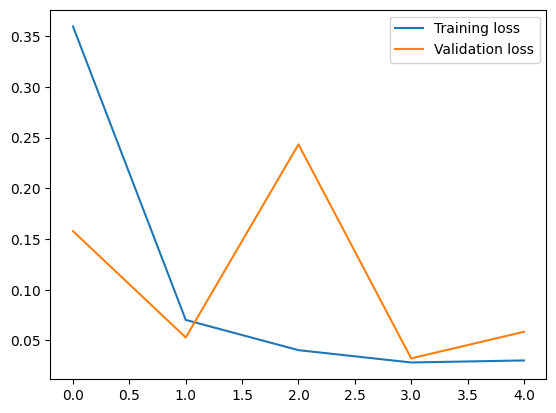

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=40  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction


[Timestamp('2024-05-08 00:00:00'), Timestamp('2024-05-09 00:00:00'), Timestamp('2024-05-10 00:00:00'), Timestamp('2024-05-13 00:00:00'), Timestamp('2024-05-14 00:00:00'), Timestamp('2024-05-15 00:00:00'), Timestamp('2024-05-16 00:00:00'), Timestamp('2024-05-17 00:00:00'), Timestamp('2024-05-20 00:00:00'), Timestamp('2024-05-21 00:00:00'), Timestamp('2024-05-22 00:00:00'), Timestamp('2024-05-23 00:00:00'), Timestamp('2024-05-24 00:00:00'), Timestamp('2024-05-28 00:00:00'), Timestamp('2024-05-29 00:00:00'), Timestamp('2024-05-30 00:00:00'), Timestamp('2024-05-31 00:00:00'), Timestamp('2024-06-03 00:00:00'), Timestamp('2024-06-04 00:00:00'), Timestamp('2024-06-05 00:00:00'), Timestamp('2024-06-06 00:00:00'), Timestamp('2024-06-07 00:00:00'), Timestamp('2024-06-10 00:00:00'), Timestamp('2024-06-11 00:00:00'), Timestamp('2024-06-12 00:00:00'), Timestamp('2024-06-13 00:00:00'), Timestamp('2024-06-14 00:00:00'), Timestamp('2024-06-17 00:00:00'), Timestamp('2024-06-18 00:00:00'), Timestamp('20

In [ ]:
prediction_copies = np.repeat(prediction, df2.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


In [ ]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


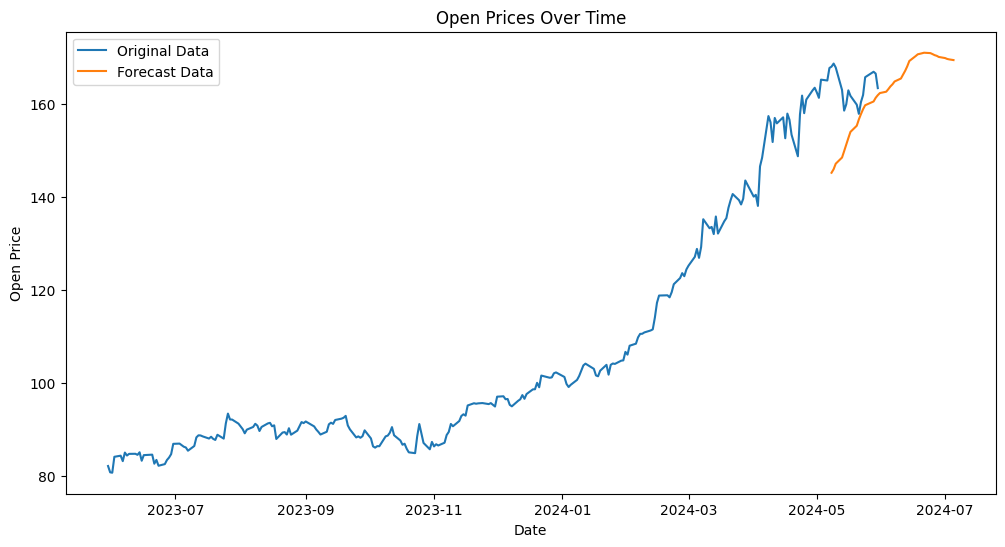

In [ ]:
original = df[['Date', 'Open']].copy()
original['Date'] = pd.to_datetime(original['Date'])

# Filter the DataFrame
original = original.loc[original['Date'] >= pd.Timestamp('2020-05-01')]

# Plotting the data using sns.lineplot with keyword arguments
plt.figure(figsize=(12, 6))  # Optional: Set the figure size for better visibility
sns.lineplot(x='Date', y='Open', data=original, label='Original Data')
sns.lineplot(x='Date', y='Open', data=df_forecast, label='Forecast Data')

# Optional: Add titles and labels
plt.title('Open Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()

# Show the plot
plt.show()